In [8]:

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
#locating the clean csv files to use
icu_plot ="../CleanCSV/clean_hospitals_by_count.csv"
county_plot = "../CleanCSV/County_Summary.csv"

In [95]:
#reading the csv file
icu_df = pd.read_csv(icu_plot)
county_df = pd.read_csv(county_plot)

#combine the two data sets
relavent_df = pd.merge(icu_df, county_df, on="County", how="outer")
#display the new data
relavent_df


,County,Date,Date.1,Confirmed Covid Patients,Suspected Covid Patinets,Confirmed Covid ICU Patients,ICU suspected COVID Patients,ICU Beds Available,Unnamed: 0,Population 2020,Population Quartiles,Total Cases,Total Cases(%)
0,Alameda,April,2020-04-30,93.0,106.0,46.0,26.0,197.0,NaN,NaN,NaN,NaN,NaN
1,Alameda,August,2020-08-31,207.0,56.0,73.0,20.0,99.0,NaN,NaN,NaN,NaN,NaN
2,Alameda,July,2020-07-31,213.0,82.0,65.0,13.0,151.0,NaN,NaN,NaN,NaN,NaN
3,Alameda,June,2020-06-30,116.0,92.0,43.0,20.0,203.0,NaN,NaN,NaN,NaN,NaN
4,Alameda,March,2020-03-31,59.0,94.0,27.0,18.0,146.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Tulare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,471389.0,Quartile 3,17048.0,0.036165
493,Tuolumne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,55539.0,Quartile 2,245.0,0.004411
494,Ventura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,851297.0,Quartile 4,13901.0,0.016329
495,Yolo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,224472.0,Quartile 3,3059.0,0.013628


[126.0,
 6.0,
 20.0,
 8.0,
 0.0,
 68.0,
 6.0,
 14.0,
 37.0,
 0.0,
 6.0,
 13.0,
 4.0,
 69.0,
 15.0,
 5.0,
 0.0,
 1043.0,
 23.0,
 14.0,
 12.0,
 9.0,
 0.0,
 2.0,
 122.0,
 15.0,
 8.0,
 457.0,
 111.0,
 0.0,
 235.0,
 184.0,
 4.0,
 277.0,
 427.0,
 149.0,
 38.0,
 968.0,
 62.0,
 90.0,
 206.0,
 28.0,
 6.0,
 62.0,
 64.0,
 100.0,
 0.0,
 8.0,
 0.0,
 30.0,
 6.0,
 56.0,
 23.0,
 16.0]

divided by zero


0.25     6.0
0.50    16.0
0.75    70.5
Name: ICU Beds Available, dtype: float64

ValueError: Bin labels must be one fewer than the number of bin edges

In [40]:
# calculates average stats per quartile
quartile_average = relavent_df.groupby('Population Quartiles').mean()
quartile_average['ICU Beds Available'] = quartile_average['ICU Beds Available'].multiply(100)
quartile_average

,Confirmed Covid Patients,Suspected Covid Patinets,Confirmed Covid ICU Patients,ICU suspected COVID Patients,ICU Beds Available
Population Quartiles,,,,,
Quartile 1,NaN,NaN,NaN,NaN,NaN
Quartile 2,NaN,NaN,NaN,NaN,NaN
Quartile 3,NaN,NaN,NaN,NaN,NaN
Quartile 4,NaN,NaN,NaN,NaN,NaN


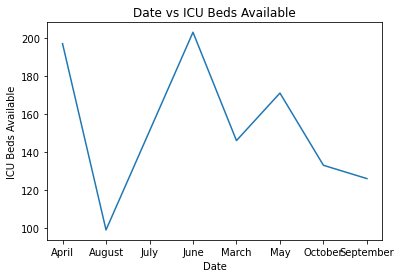

In [22]:
# Find all the mice that were treated with Capomulin
icu_line = icu_df.loc[icu_df["county"]=="Alameda"]
icu_line
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_icu = icu_line.loc[icu_line["county"]=="Alameda"]
time_series = cap_icu["Date"]
plt.plot(time_series, cap_icu["ICU Beds Available"])
plt.title("Date vs ICU Beds Available")
plt.xlabel("Date")
plt.ylabel("ICU Beds Available")
plt.show()